In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import pandas

# File path and type pair
file_path = 'data_simulation/structure_function'
type_pair = "A_A"  # Options: "A_A", "A_B", "B_B"

# Load initial structure function file to extract nx and lx
print(f"{file_path}_100000.mat")
data = loadmat(f"{file_path}_100000.mat", squeeze_me=True)
nx = data['nx'].astype(int)
lx = data['lx']

# Calculate k² and initialize k² mapping
k2 = np.zeros((nx[0], nx[1], nx[2]//2 + 1), dtype=np.float64)
k2_mapping = np.zeros_like(k2, dtype=np.int32)

for i in range(nx[0]):
    for j in range(nx[1]):
        for k in range(nx[2]//2 + 1):
            temp_i = min(i, nx[0] - i)
            temp_j = min(j, nx[1] - j)
            temp_k = k
            val = round((temp_i/lx[0])**2 + (temp_j/lx[1])**2 + (temp_k/lx[2])**2, 7)
            k2[i, j, k] = val

# Find unique k² values and map them
k2_unique, inverse_indices = np.unique(k2, return_inverse=True)
k2_mapping = inverse_indices.reshape(k2.shape)

# Initialize structure function magnitude and count arrays
sf_mag = np.zeros_like(k2_unique)
sf_count = np.zeros_like(k2_unique)

# Loop over simulation time steps
for langevin_iter in range(100000, 500000, 100000):
    file_name = f"{file_path}_{langevin_iter:06d}.mat"
    print(file_name)
    data = loadmat(file_name)

    # Load the appropriate structure function variable (e.g., structure_function_A_A)
    v = data[f'structure_function_{type_pair}']

    # Aggregate structure function values
    for i in range(nx[0]):
        for j in range(nx[1]):
            for k in range(nx[2]//2 + 1):
                idx = k2_mapping[i, j, k]
                sf_mag[idx] += v[i, j, k].real
                sf_count[idx] += 1

# Compute the final result
x = np.sqrt(k2_unique) * 2 * np.pi
y = sf_mag / sf_count
y[0] = 0.0  # Set first element to 0

data_simulation/structure_function_100000.mat
data_simulation/structure_function_100000.mat
data_simulation/structure_function_200000.mat
data_simulation/structure_function_300000.mat
data_simulation/structure_function_400000.mat


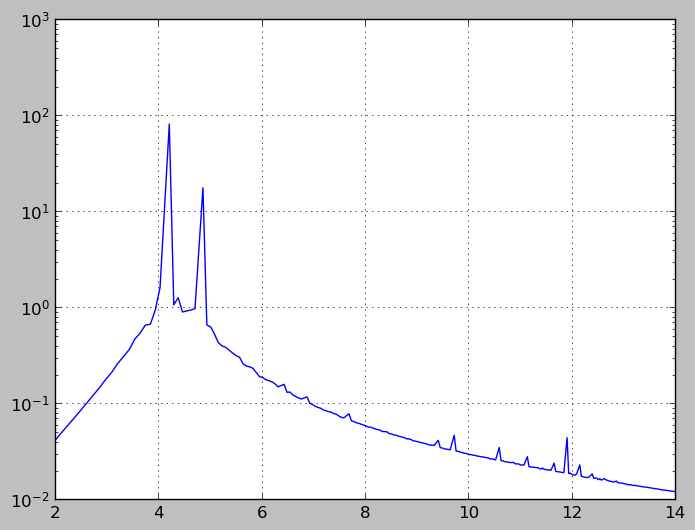

In [ ]:
# Plot
plt.figure(dpi=100)
plt.style.use('classic')

plt.plot(x, y)
plt.yscale('log')
plt.xlim([2, 14])
plt.ylim([0.01, 1000])
plt.grid(True)
plt.show()

In [ ]:
# Write
df = pandas.DataFrame({'k': x, 's(k)': y})
df.to_excel("data.xlsx", sheet_name='sheet1', index=False)